# **CovidModeling**

In [ ]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# load the data
df = pd.read_excel("dataset1.xlsx")

In [ ]:
# lets try to look the data
df.head()

,date,username,replies,retweets,favorites,text,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,2020-04-15 15:21:15,WHO,38,195,507,"""Our commitment to public health, science and ...",NaN,NaN,NaN,NaN,NaN
1,2020-04-15 15:20:36,WHO,21,100,339,We also work with countries to strengthen heal...,NaN,NaN,NaN,NaN,NaN
2,2020-04-15 15:19:58,WHO,25,100,285,"""With support from the people and government o...",NaN,NaN,NaN,NaN,NaN
3,2020-04-15 15:19:35,WHO,79,152,345,"""That creed remains our vision today. The has ...",NaN,NaN,NaN,NaN,NaN
4,2020-04-15 15:18:41,WHO,25,116,346,"""They expressed that desire in the @WHO consti...",NaN,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(1708, 11)

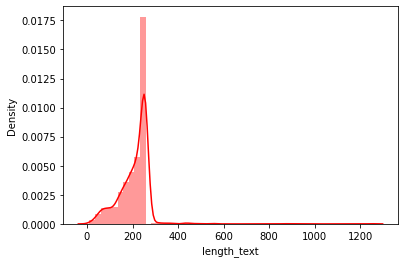

In [ ]:
df['length_text'] = df['text'].str.len()
sns.distplot(df['length_text'], color="r")
plt.show()

In [ ]:
# importing the NLP libraries that will be used for preprocessing
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
# stopwords.
from nltk.probability import FreqDist
from wordcloud import WordCloud

from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()
from nltk.stem import PorterStemmer
ps = PorterStemmer() #creating an instance of the class

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
import string

In [ ]:
# define a function for cleaning the data e.g remove stop words, digits, punctuation etc
def data_cleaning(df,column_name, full_text = False):
    stop_words=stopwords.words("english")
    cleaned_list = []
    for i in df[column_name]:
            text = re.sub(r'[^\w\s]', '', i) # Removing punctuations in string
            text = re.sub('\w*\d\w*', '', text)
            text = re.sub(r'http\S+', '', text)
            res = re.sub(r'https\S+', '', text)

            words = nltk.word_tokenize(str(res))
            clean_from_digits = [word.lower() for word in words if not word.isdigit() if (len(word)>2)]
            clean = [ps.stem(word) for word in clean_from_digits if (word not in stop_words) ]
            cleaned_list.append(clean)
    final = []
    for i in cleaned_list:
        for j in i:
            final.append(j)
    
    preprocess_cols = []
    if full_text == True:
        for p in cleaned_list:
            preprocess_cols.append(" ".join(p))
        return preprocess_cols
    return final

In [ ]:
# function for extracting the most common words in reviews text
def most_common_words(cleaned_col_name_list,common_words = 10):
    fdist = FreqDist(cleaned_col_name_list)
    most_common=fdist.most_common(common_words)
    return most_common

In [ ]:
# plotting the graph of most common words
def frequency_dis_graph(cleaned_col_name_list,num_of_words=10):
    fdist = FreqDist(cleaned_col_name_list)
    fdist.plot(num_of_words,cumulative=False, marker='o')
    plt.show()

In [ ]:
# draw a graph of word which are most common
def word_cloud(data):
    unique_string=(" ").join(data)
    wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.savefig("your_file_name"+".png", bbox_inches='tight')
    plt.show()
    plt.close()

In [ ]:
# function for words in dataframe format
def table_format(data_list,column_name):
    df_ = pd.DataFrame(data_list, columns = [column_name,'Frequency_distribution'])
    return df_

In [ ]:
# calling a function
clean_df = data_cleaning(df, 'text')

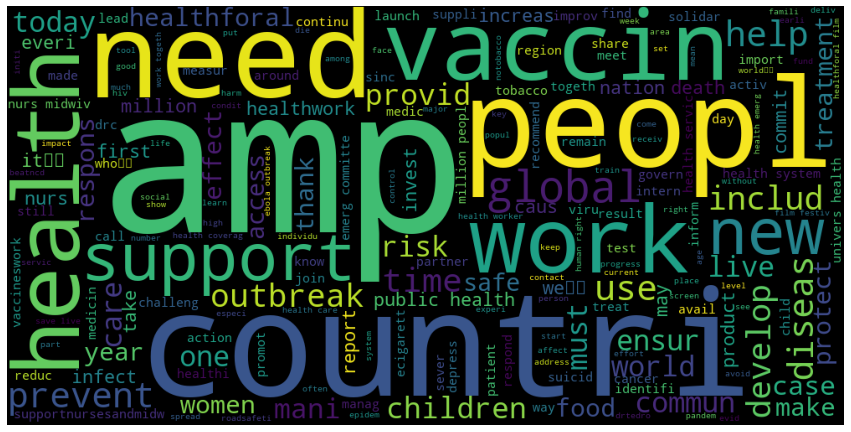

In [ ]:
# draw word cloud
word_cloud(clean_df)

In [ ]:
# lets try to check the 10 most common words
MCW = most_common_words(clean_df)
table_format(MCW, 'text')

,text,Frequency_distribution
0,health,600
1,amp,515
2,countri,332
3,peopl,260
4,work,180
5,diseas,174
6,need,159
7,global,151
8,live,142
9,year,142


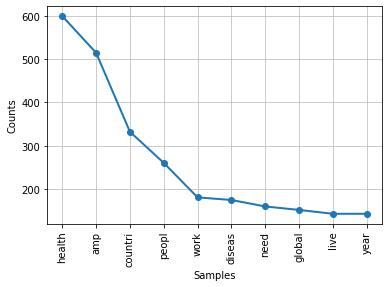

In [ ]:
# graph for showing top 10 most common words
frequency_dis_graph(clean_df)

In [ ]:
# adding a new column after preprocessing
df['preprocess_text'] = data_cleaning(df, 'text', full_text = True)

In [ ]:
df = df[['text', 'preprocess_text']]

In [ ]:
df

,text,preprocess_text
0,"""Our commitment to public health, science and ...",commit public health scienc serv peopl world w...
1,We also work with countries to strengthen heal...,also work countri strengthen health system imp...
2,"""With support from the people and government o...",support peopl govern work improv health mani w...
3,"""That creed remains our vision today. The has ...",creed remain vision today longstand gener frie...
4,"""They expressed that desire in the @WHO consti...",express desir constitut say enjoy highest atta...
...,...,...
1703,The lack of visible smog is no indication that...,lack visibl smog indic air healthi across citi...
1704,"#AirPollution is hard to escape, no matter how...",airpollut hard escap matter rich area live mic...
1705,More than 90% of the world鈥檚 children breathe ...,world鈥檚 children breath toxic air everi day es...
1706,#CervicalCancer control needs good data http:/...,cervicalcanc control need good data cervicalhe...


In [ ]:
df.iloc[1706]['text']

'#CervicalCancer control needs good data http://bit.ly/2DU8LqD #CervicalHealthMonth'

In [ ]:
df.iloc[1706]['preprocess_text']

'cervicalcanc control need good data cervicalhealthmonth'

In [ ]:
# Import classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

import time

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, classification_report,confusion_matrix

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [ ]:
# Fit and transform the training data to a document-term matrix using TfidfVectorizer 
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(df['preprocess_text'].values)
print ("Number of features : %d" %len(tfidf.get_feature_names()))

Number of features : 4490


In [ ]:
# def get_lda_topics(model, num_topics):
#     word_dict = {};
#     for i in range(num_topics):
#         words = model.show_topic(i, topn = 20);
#         word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words];
#     return pd.DataFrame(word_dict);

In [ ]:
from sklearn.decomposition import NMF, LatentDirichletAllocation

#**TF-IDF**

In [ ]:
# use tfidf by removing tokens that don't appear in at least 50 documents
vect = TfidfVectorizer(min_df=50, stop_words='english')
 
# Fit and transform
X = vect.fit_transform(df.text)

# **Non-negative Matrix Factorization**

In [ ]:
# Create an NMF instance: model
# the 10 components will be the topics
model = NMF(n_components=10, random_state=5)
 
# Fit the model to TF-IDF
model.fit(X)
 
# Transform the TF-IDF: nmf_features
nmf_features = model.transform(X)

In [ ]:
# TF-IDF dimension
X.shape

(1708, 61)

In [ ]:
# Features Dimensions:
nmf_features.shape

(1708, 10)

In [ ]:
# Components Dimensions:
model.components_.shape

(10, 61)

In [ ]:
# Create a DataFrame: components_df
components_df = pd.DataFrame(model.components_, columns=vect.get_feature_names())
components_df

,000,2019ncov,2020,access,amp,bit,cancer,care,cases,children,...,today,treatment,use,wha73,women,work,working,world,year,years
0,0.000000,0.000000,0.088183,0.039755,0.00000,2.442555,0.148001,0.042063,0.000000,0.176973,...,0.039566,0.099114,0.036052,0.000000,0.168247,0.039791,0.021943,0.000000,0.041855,0.123965
1,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.060516,...,0.091207,0.000000,0.000000,0.000000,0.000000,0.005889,0.000000,0.000000,0.066277,0.087155
2,0.036821,0.000000,0.044100,0.105908,2.56877,0.000000,0.030399,0.027542,0.022454,0.000000,...,0.052435,0.016406,0.036454,0.000000,0.079870,0.173564,0.135948,0.000000,0.071458,0.022813
3,0.000000,0.000000,0.003736,0.185656,0.00000,0.000000,0.000000,0.340766,0.000000,0.000989,...,0.049548,0.031309,0.000000,0.003232,0.107236,0.089501,0.000000,0.000000,0.009402,0.000000
4,0.123646,0.000000,0.078320,0.093187,0.00000,0.000000,0.034862,0.000000,0.276617,0.000000,...,0.011126,0.150268,0.223895,0.000000,0.000000,0.142820,0.265236,0.000000,0.000000,0.000000
5,0.270925,0.000000,0.119581,0.048347,0.00000,0.000000,0.155920,0.167724,0.000000,0.237039,...,0.064667,0.146716,0.209718,0.000000,0.039393,0.000000,0.009223,0.000000,0.212919,0.067765
6,0.032296,0.000000,0.197869,0.045820,0.00000,1.026793,0.000000,0.020561,0.000000,0.249162,...,0.035171,0.048338,0.000000,0.236584,0.085893,0.000000,0.000000,0.000000,0.025119,0.019249
7,0.102703,3.264712,0.180252,0.000000,0.00000,0.000000,0.000000,0.009339,0.434357,0.000000,...,0.211535,0.000000,0.031464,0.000000,0.000000,0.000000,0.004194,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.032178,0.000000,0.00000,0.000000,0.001626,0.000000,0.392494,0.000000,...,0.128977,0.036836,0.000000,0.000000,0.000000,0.000000,0.047201,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.012079,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.029525,...,0.056070,0.000000,0.023710,0.918916,0.000000,0.355440,0.101469,2.022007,0.322360,0.171700


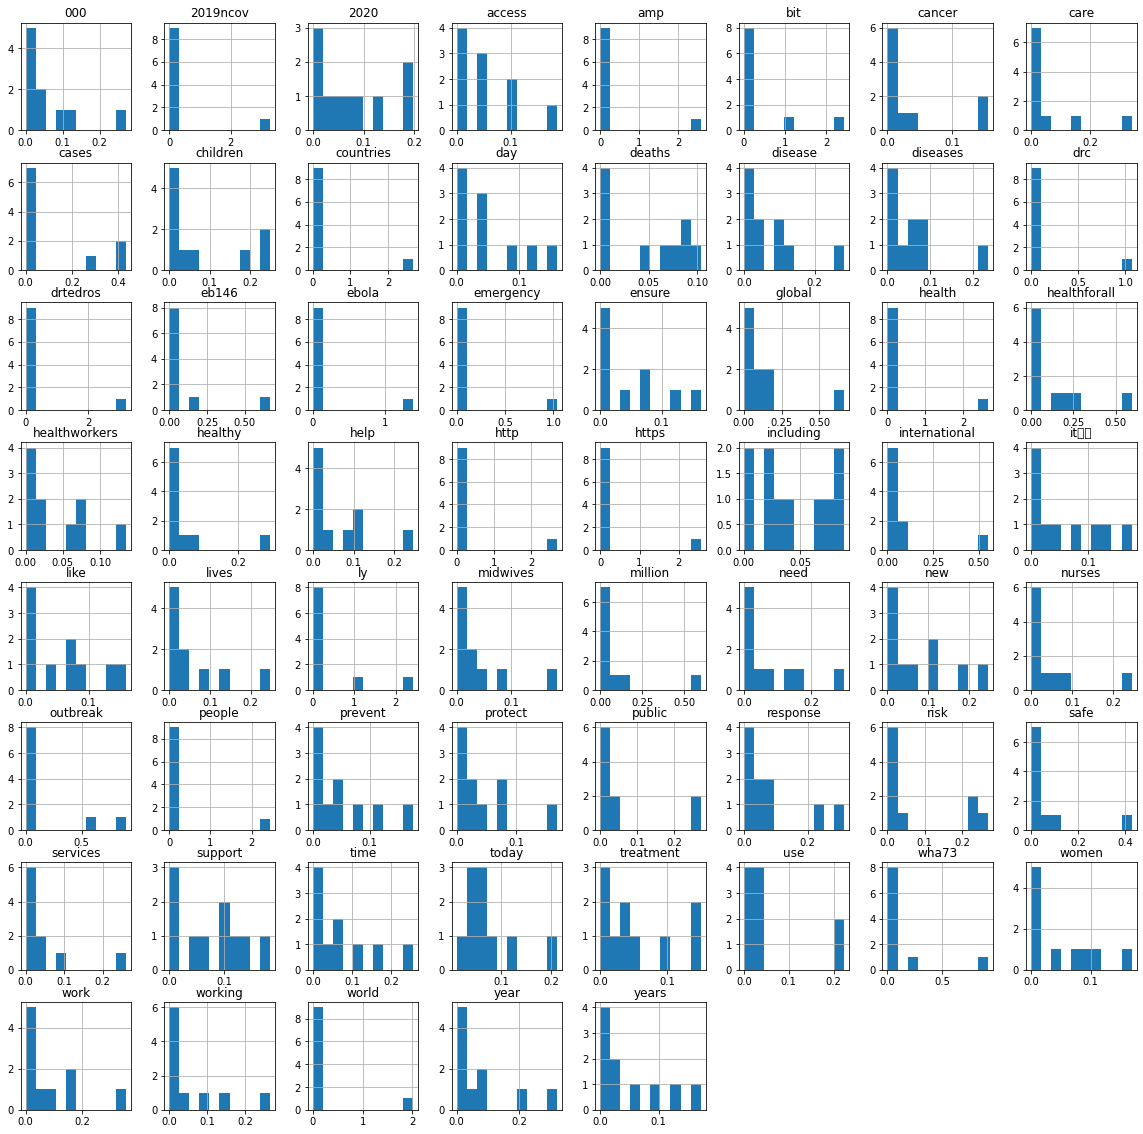

In [ ]:
# letc check the histogram
components_df.hist(figsize=(20,20))
plt.show()

In [ ]:
for topic in range(components_df.shape[0]):
    tmp = components_df.iloc[topic]
    print(f'For topic {topic+1} the words with the highest value are:')
    print(tmp.nlargest(10))
    print('\n')

For topic 1 the words with the highest value are:
http            2.698117
bit             2.442555
ly              2.429202
help            0.246471
risk            0.220304
new             0.191849
healthforall    0.190494
global          0.178291
children        0.176973
women           0.168247
Name: topic1, dtype: float64


For topic 2 the words with the highest value are:
drtedros        3.221393
eb146           0.664840
new             0.246233
healthforall    0.121398
today           0.091207
years           0.087155
like            0.070928
it鈥檚            0.070491
response        0.068716
year            0.066277
Name: topic2, dtype: float64


For topic 3 the words with the highest value are:
amp              2.568770
work             0.173564
working          0.135948
healthworkers    0.134620
like             0.129250
new              0.120716
support          0.118846
access           0.105908
help             0.102107
healthy          0.086805
Name: topic3, dtype: float64

For topic 1:


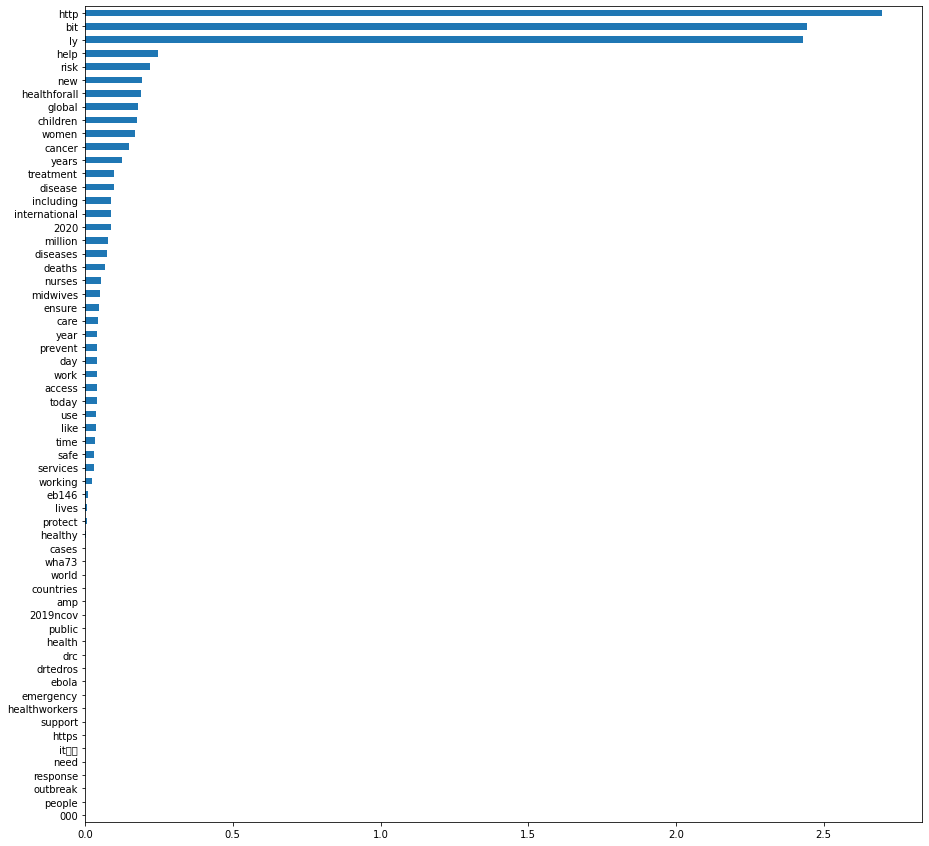

For topic 2:


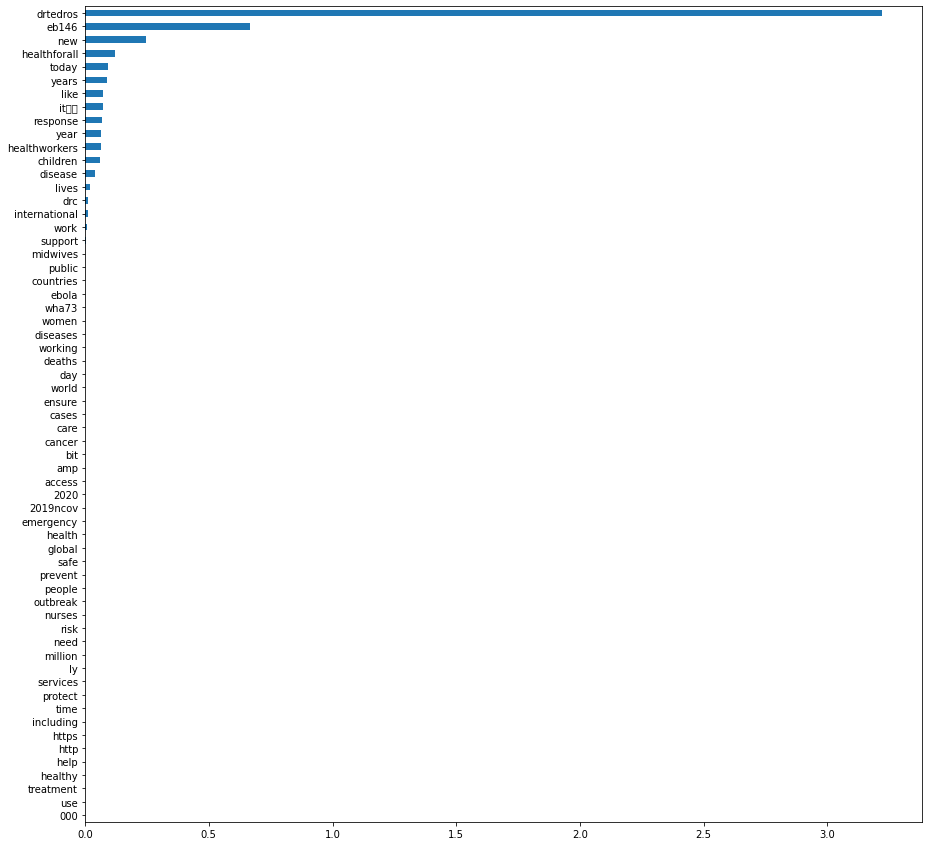

For topic 3:


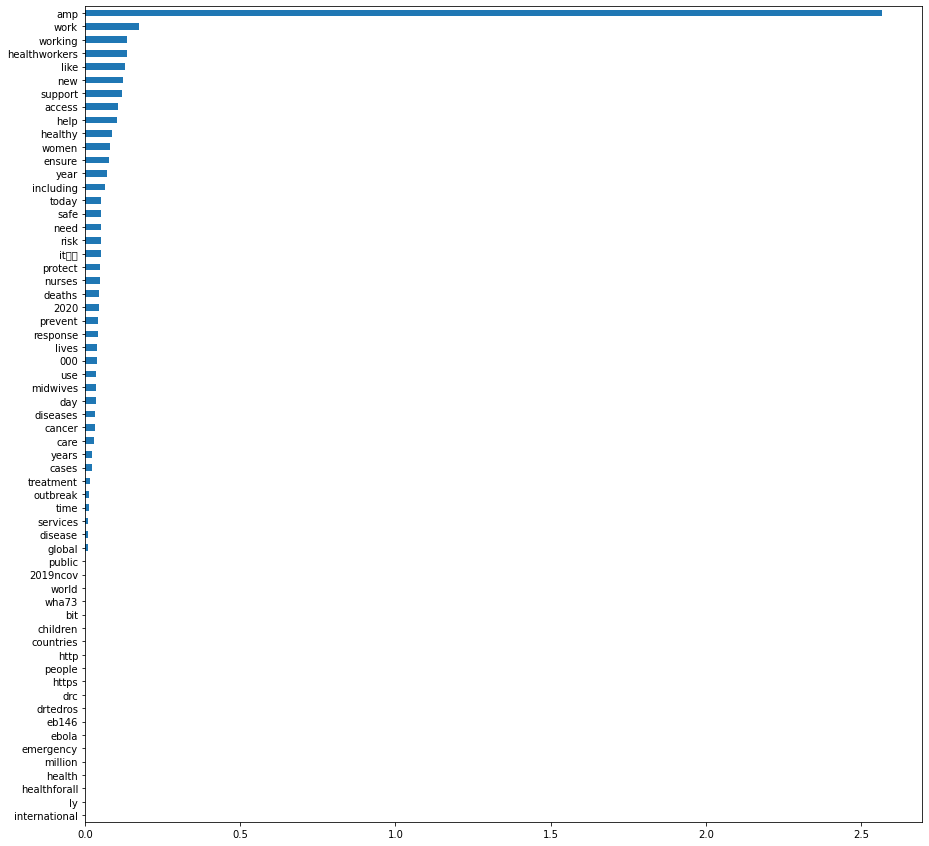

For topic 4:


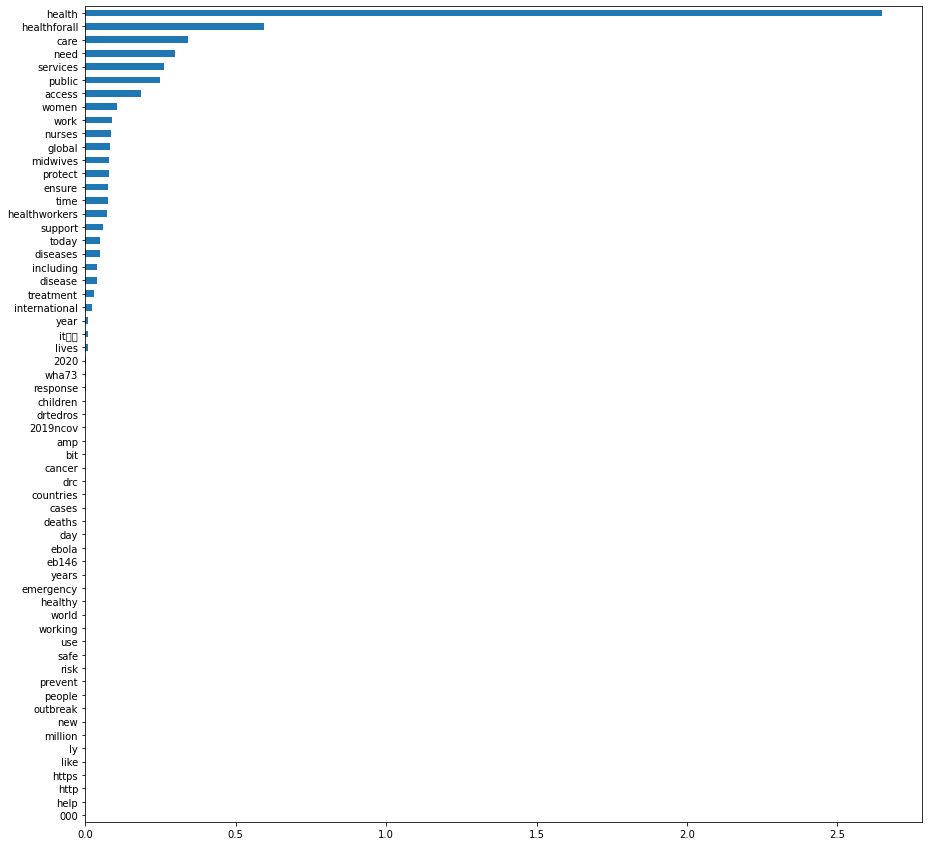

For topic 5:


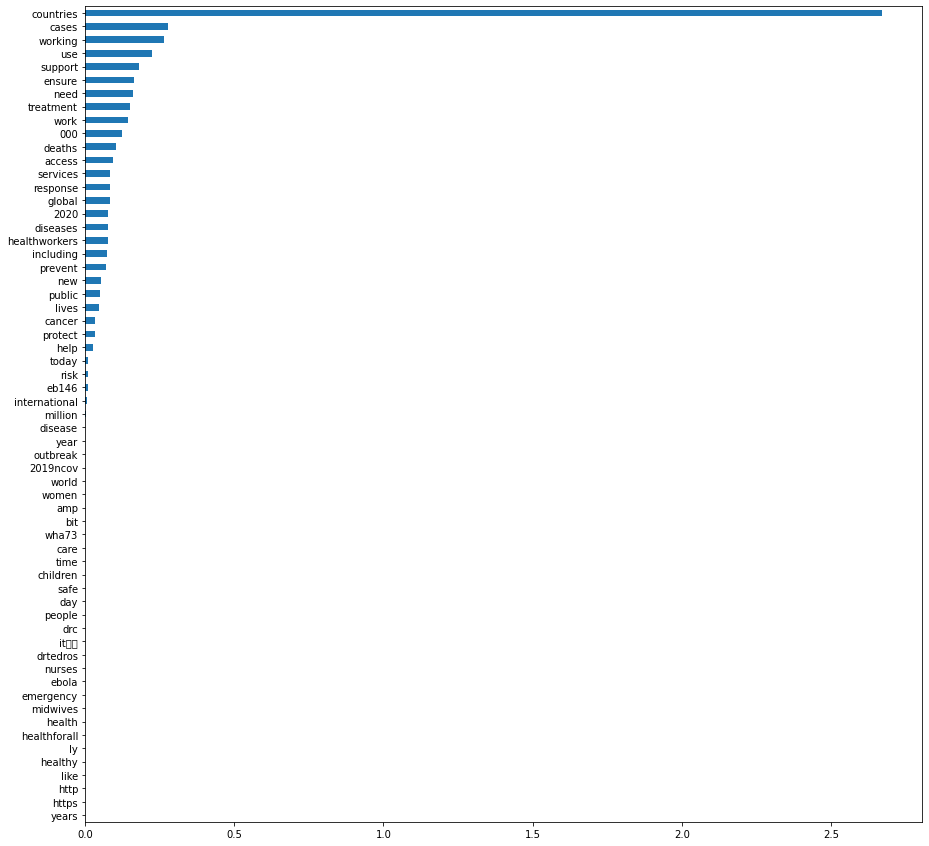

For topic 6:


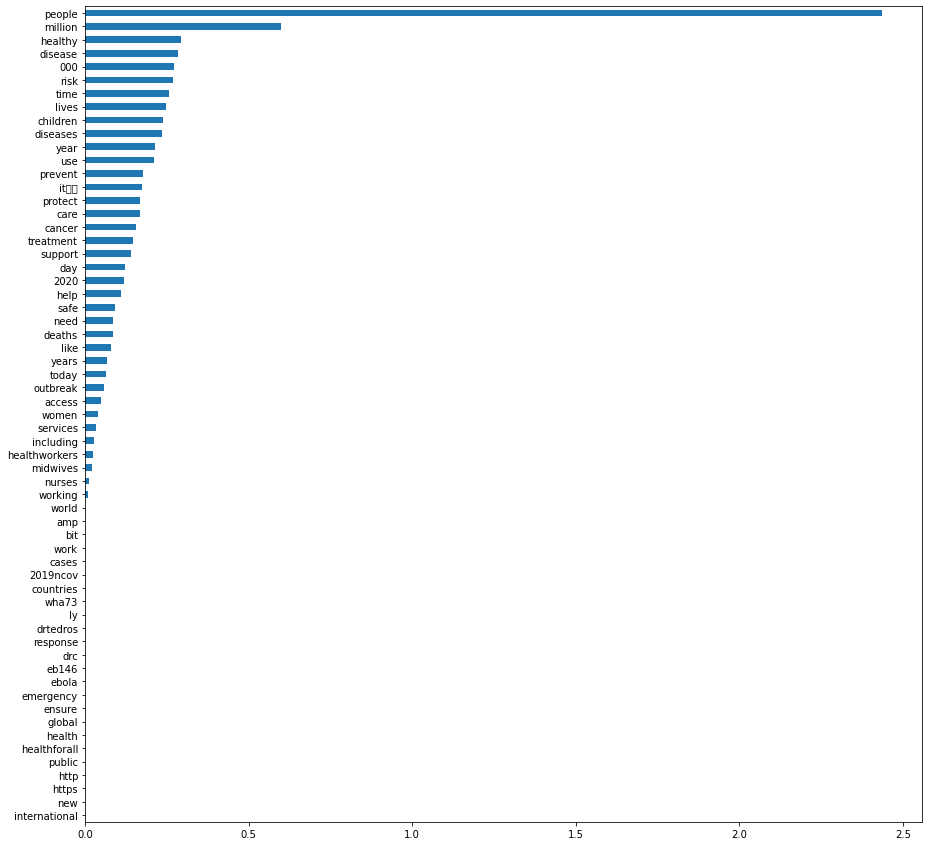

For topic 7:


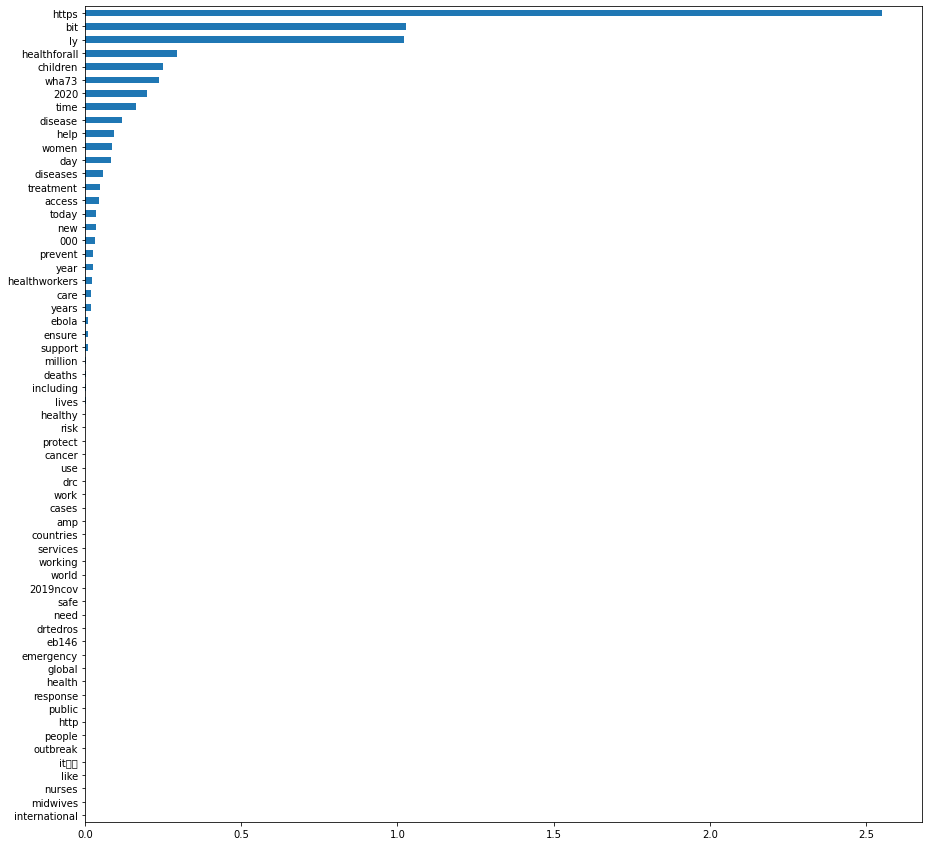

For topic 8:


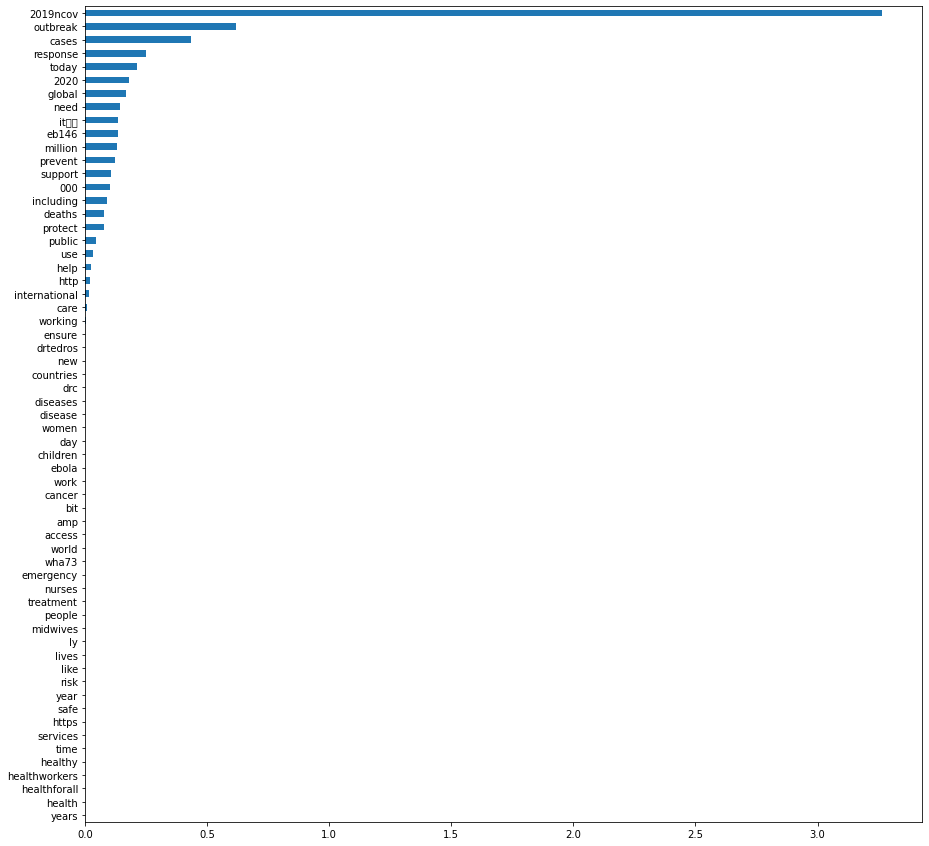

For topic 9:


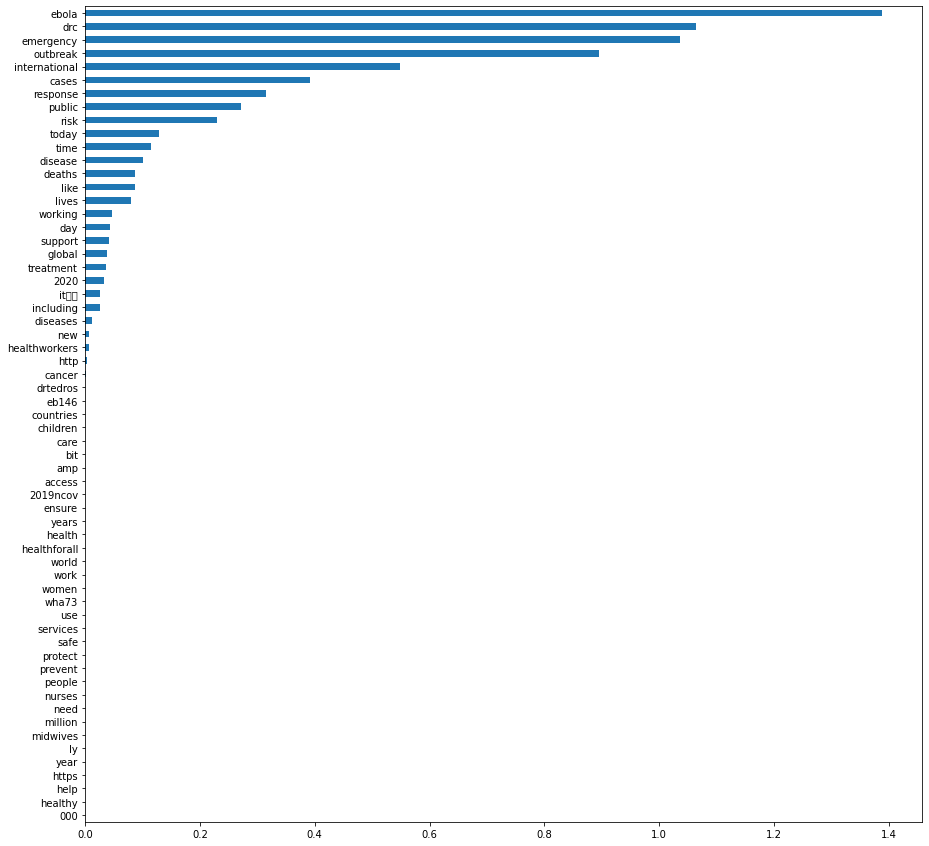

For topic 10:


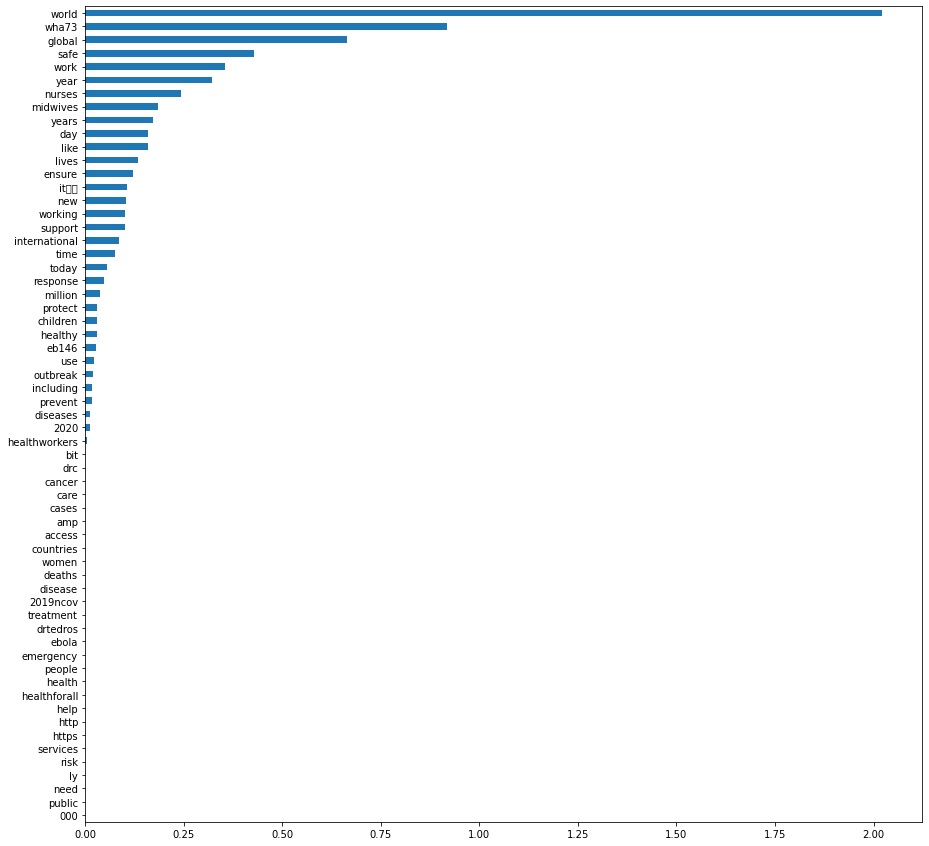

In [ ]:
for topic in range(components_df.shape[0]):
    print(f'For topic {topic+1}:')
    components_df.iloc[topic].sort_values().plot.barh(figsize=(15,15))
    plt.show()

In [ ]:
df_ = components_df
df_.index = ['topic'+str(i+1) for i in range(10)]

import plotly.express as px

plt.figure(figsize=(15,15))
# df = px.data.gapminder().query("continent == 'Europe' and year == 2007 and pop > 2.e6")
fig = px.bar(df_, x=df_.columns.tolist(),
            title="NMF Topic Modeling")
fig.show()

<Figure size 1080x1080 with 0 Axes>

# **Latent Dirichlet Allocation**

In [ ]:
# Create an NMF instance: model
# the 10 components will be the topics
model = LatentDirichletAllocation(n_components=10, random_state=5)
 
# Fit the model to TF-IDF
model.fit(X)
 
# Transform the TF-IDF: lda_features
lda_features = model.transform(X)

In [ ]:
# Create a DataFrame: components_df
components_df = pd.DataFrame(model.components_, columns=vect.get_feature_names())
components_df

,000,2019ncov,2020,access,amp,bit,cancer,care,cases,children,...,today,treatment,use,wha73,women,work,working,world,year,years
0,26.532601,0.100003,14.398676,0.100003,7.088136,0.100019,0.100007,0.142682,0.100007,0.100005,...,8.445326,0.100012,0.100007,0.100005,2.111348,0.100023,0.100014,5.617091,17.772965,0.100006
1,0.100009,7.388966,22.283933,0.100001,1.184677,0.100008,0.100000,0.100007,9.986311,0.100002,...,5.286618,0.100011,0.100004,0.100004,0.100002,0.100053,2.608081,0.100011,3.363090,0.100008
2,0.100001,0.120774,0.100017,0.100891,0.100008,132.491747,0.100001,0.526717,0.100006,0.100004,...,4.898611,0.100006,0.100002,0.100005,0.100007,3.143315,0.100003,0.100007,0.100011,0.100003
3,0.100001,0.100003,0.100012,0.100039,17.569629,0.100009,0.100000,38.326679,0.100000,0.100005,...,4.744542,0.100006,0.100007,0.100001,8.333842,3.746684,0.100223,3.999844,7.076531,0.100005
4,0.100003,0.100010,0.100005,33.984779,16.062540,0.100010,6.827022,7.857305,33.091326,0.100004,...,0.100057,26.227038,1.589813,0.100003,0.100005,0.100004,0.100004,0.100009,0.100005,0.100002
5,0.100006,73.385357,0.100004,0.100001,0.735171,0.100004,0.100002,0.100002,0.100156,0.100000,...,12.865714,0.100002,0.100004,0.100001,0.100000,1.942965,0.100001,0.314532,0.100003,0.100009
6,1.147364,0.100012,0.100008,0.100003,0.100008,6.555528,0.100020,0.100007,0.100005,43.758625,...,0.100056,0.100011,0.100001,0.100001,0.100007,0.100008,23.877554,0.100015,5.561787,7.713886
7,0.100004,0.100005,0.100011,0.100009,112.437240,0.100005,0.100002,0.100008,0.100003,0.100000,...,1.683659,0.100005,0.100005,0.100001,0.100008,27.322362,8.101625,0.100003,0.100010,0.100008
8,0.100013,0.100002,0.100004,0.105282,4.224101,24.556903,24.035713,0.765493,0.100005,0.100019,...,0.877483,2.464295,0.100018,0.100001,27.064591,0.100007,0.100004,0.100006,0.100006,16.938774
9,0.100003,0.100003,0.100006,0.100006,0.160856,0.100007,0.100001,0.100011,0.100002,0.100001,...,0.100014,0.100000,36.523201,38.457615,0.100005,10.230032,4.010616,51.887444,7.016101,5.320905


In [ ]:
for topic in range(components_df.shape[0]):
    tmp = components_df.iloc[topic]
    print(f'For topic {topic+1} the words with the highest value are:')
    print(tmp.nlargest(10))
    print('\n')

For topic 1 the words with the highest value are:
people       56.325965
million      31.432683
lives        30.455200
000          26.532601
day          24.930039
year         17.772965
2020         14.398676
protect      14.011906
countries    11.444864
today         8.445326
Name: 0, dtype: float64


For topic 2 the words with the highest value are:
ebola            39.307519
drc              30.656058
emergency        29.981289
public           23.670458
international    23.631272
2020             22.283933
outbreak         21.732011
health           18.066040
drtedros         14.068629
cases             9.986311
Name: 1, dtype: float64


For topic 3 the words with the highest value are:
bit             132.491747
ly              131.065791
http            121.513720
https            50.208622
healthforall     48.629444
health           45.726507
global           17.304948
countries         8.022313
including         6.522414
ensure            6.512849
Name: 2, dtype: float64


Fo

For topic 1:


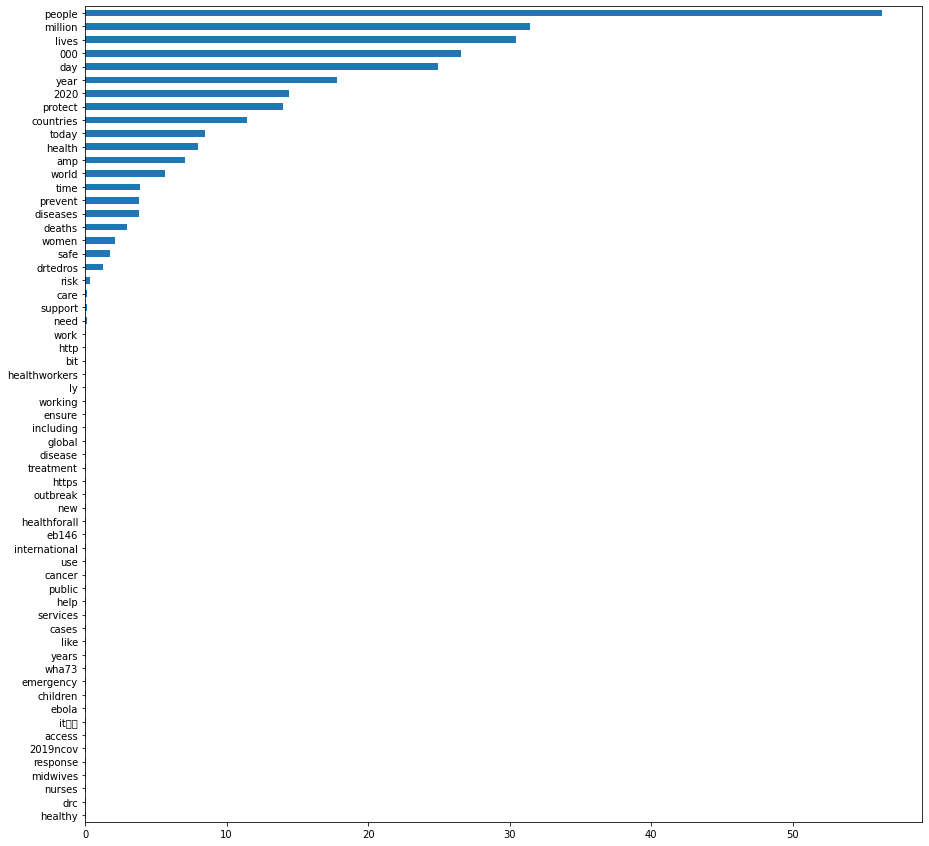

For topic 2:


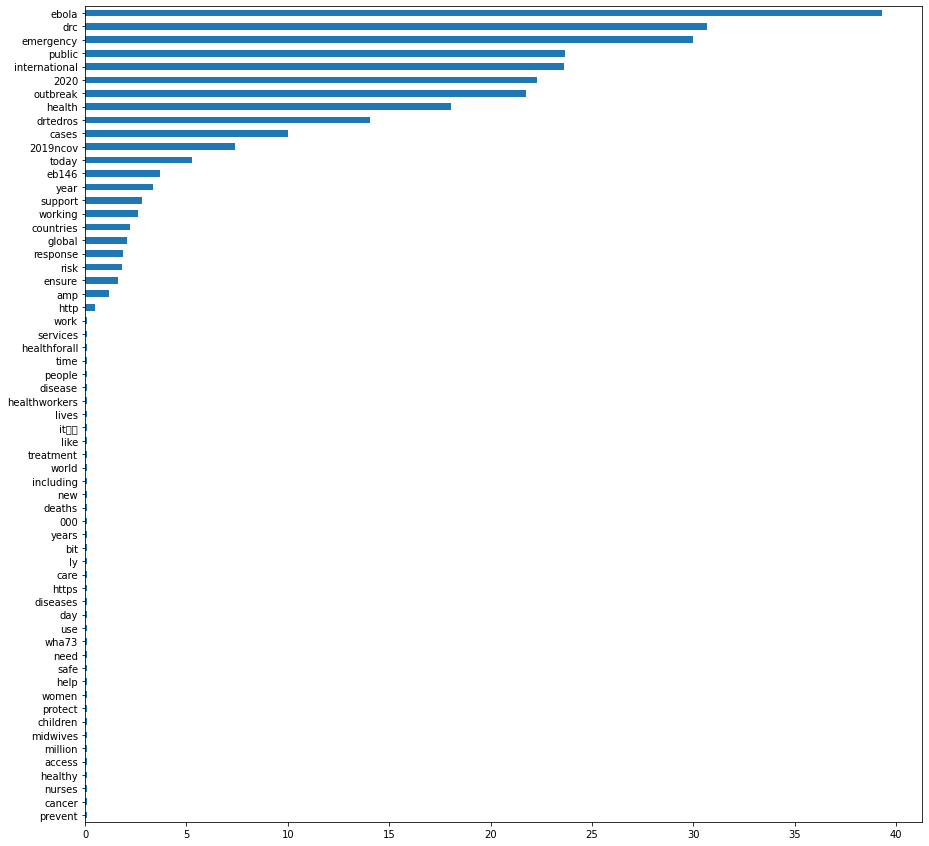

For topic 3:


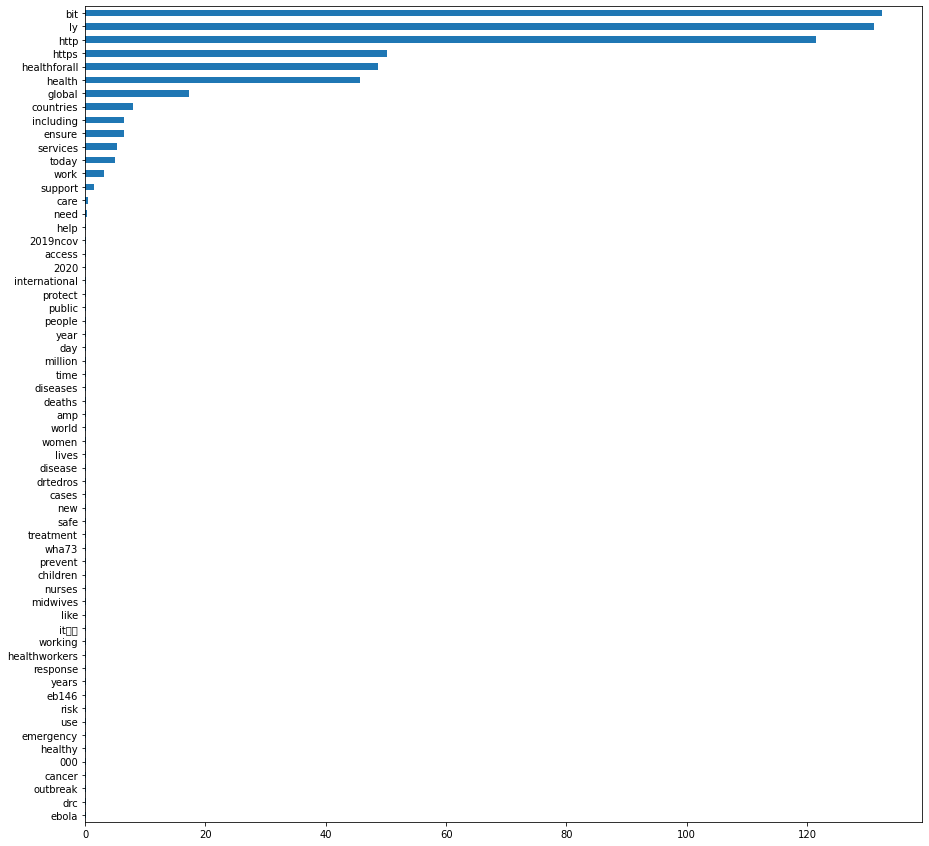

For topic 4:


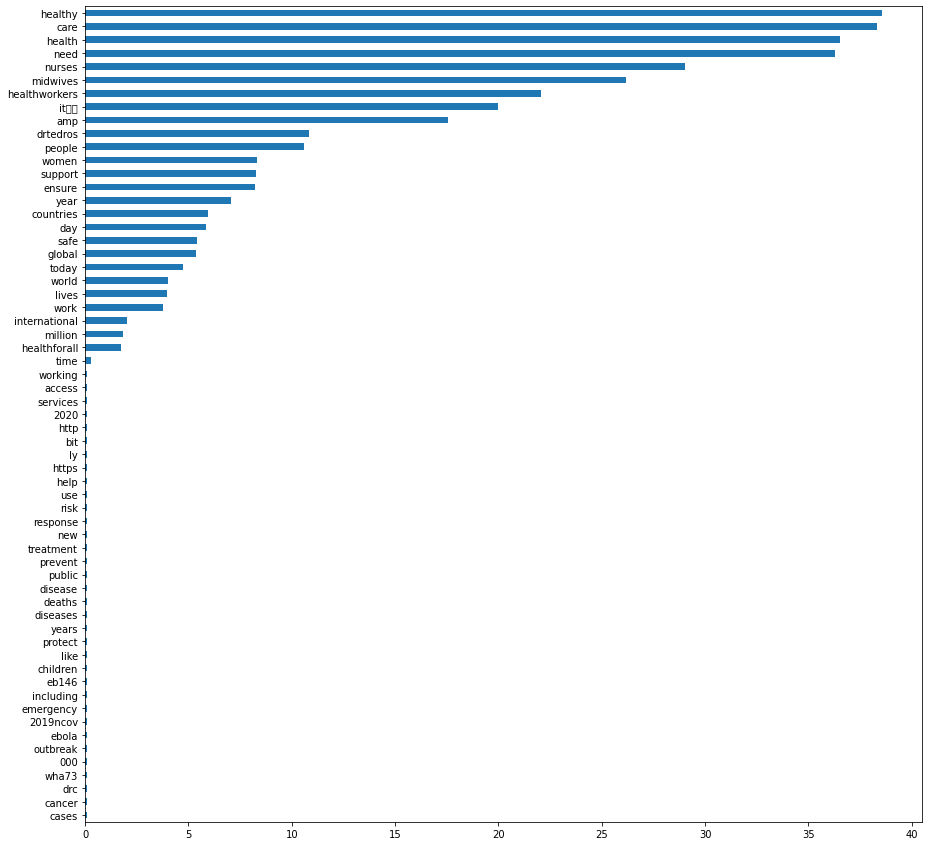

For topic 5:


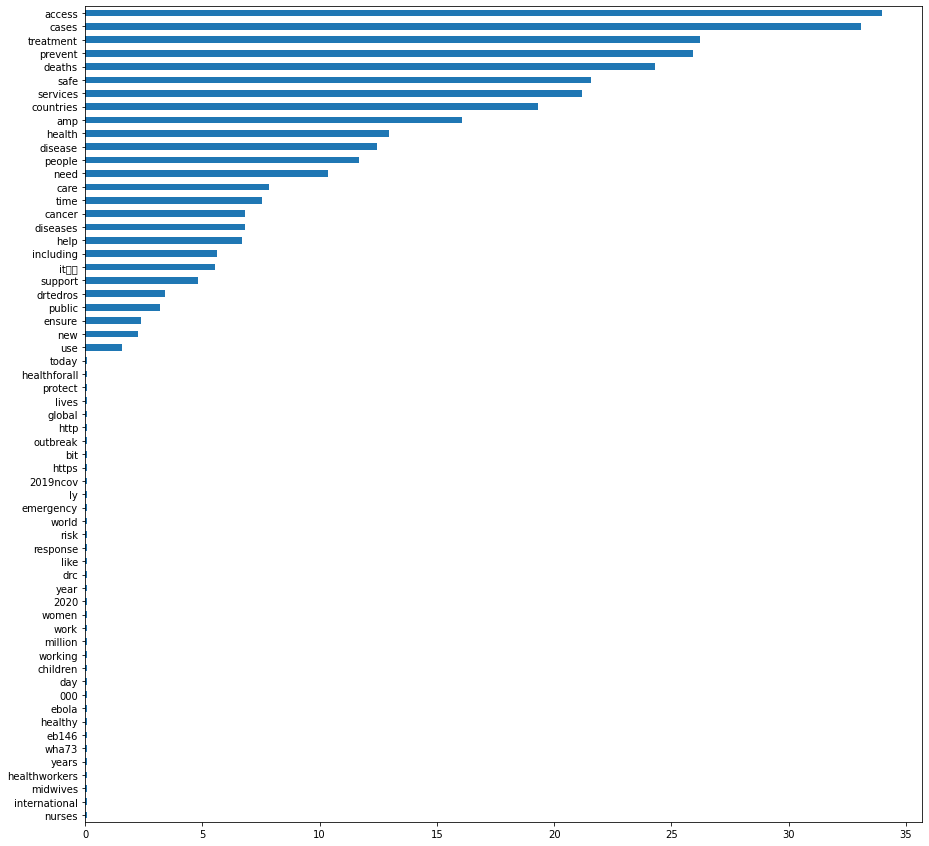

For topic 6:


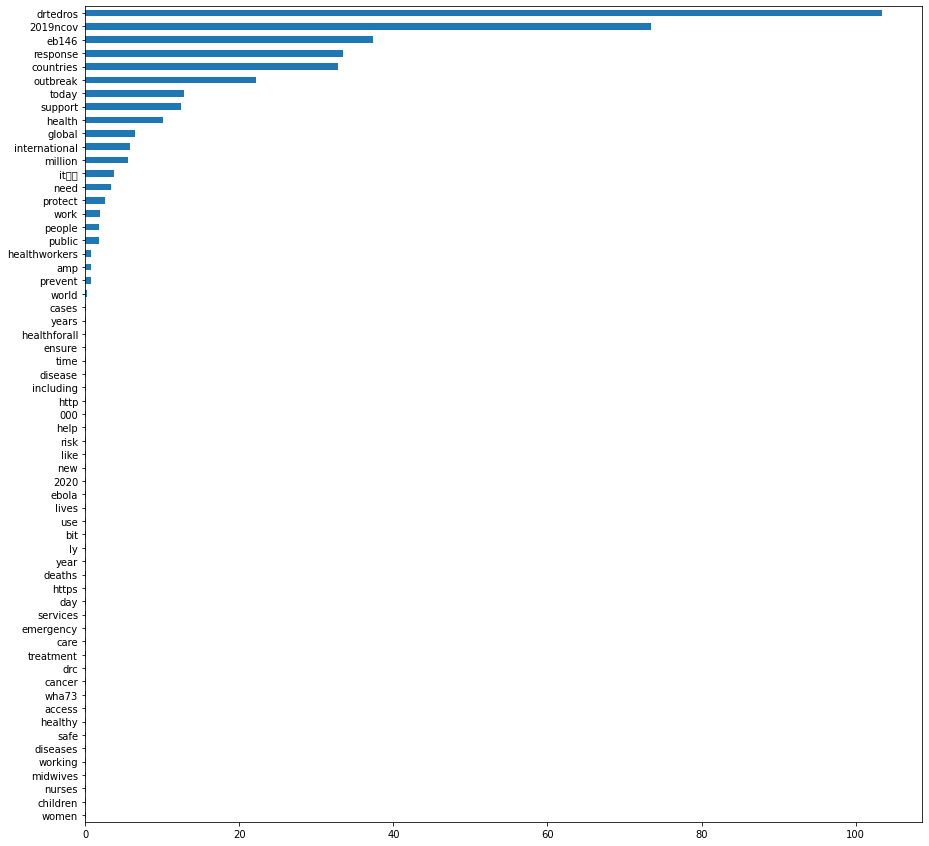

For topic 7:


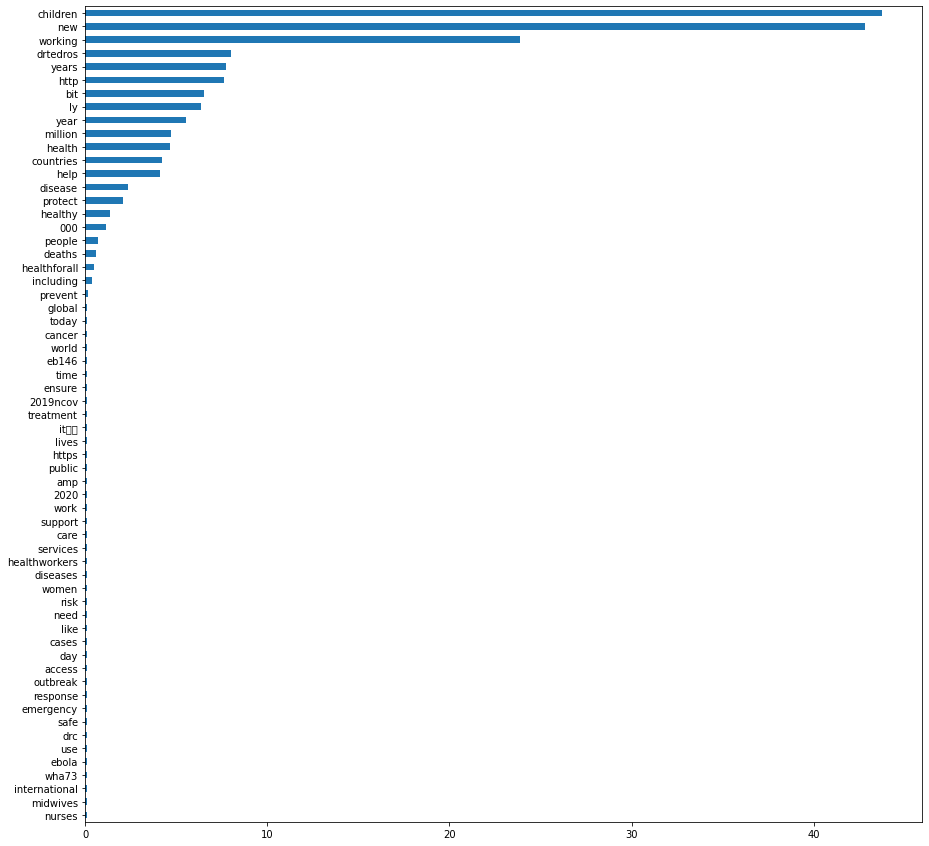

For topic 8:


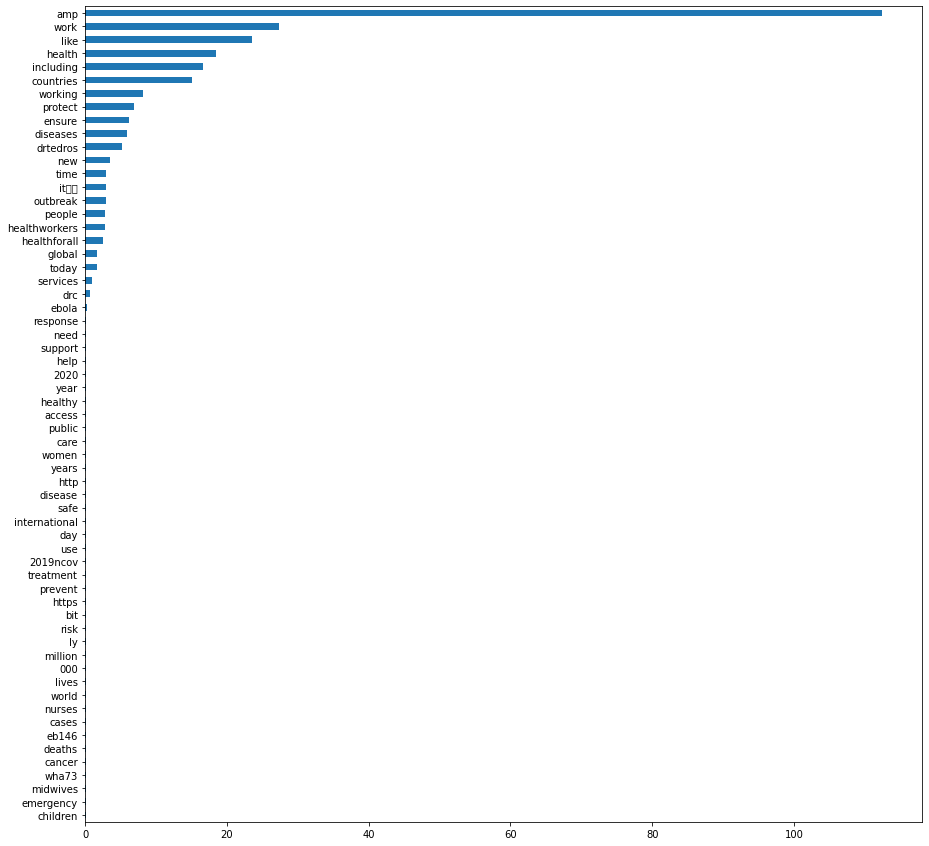

For topic 9:


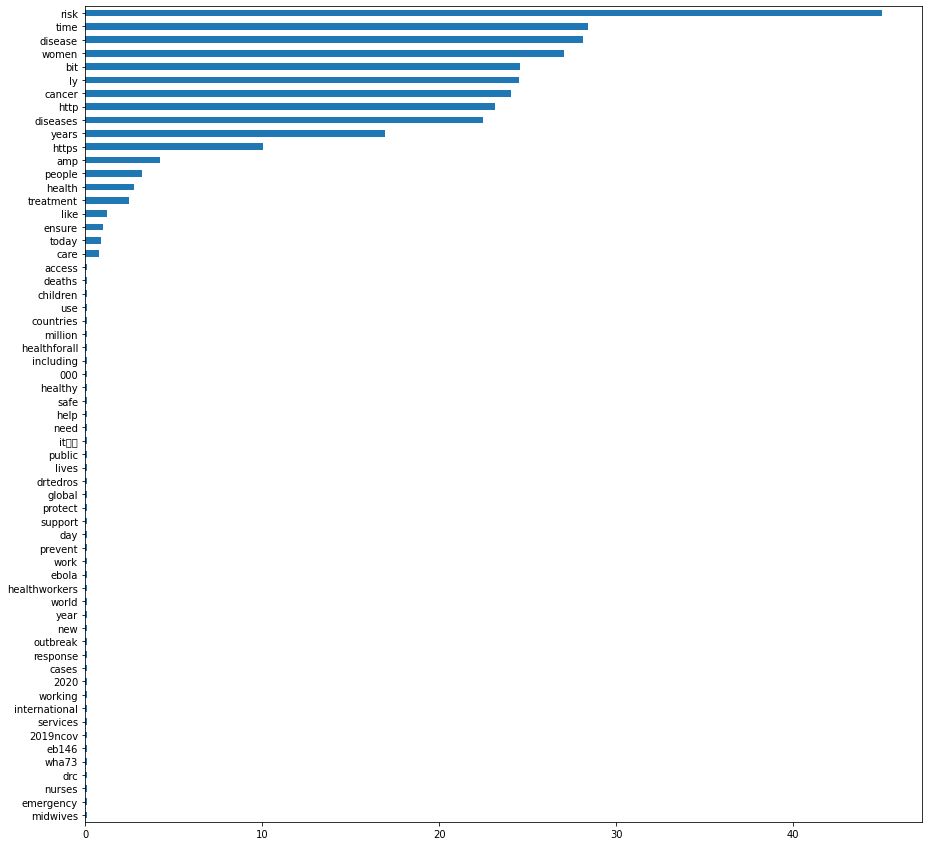

For topic 10:


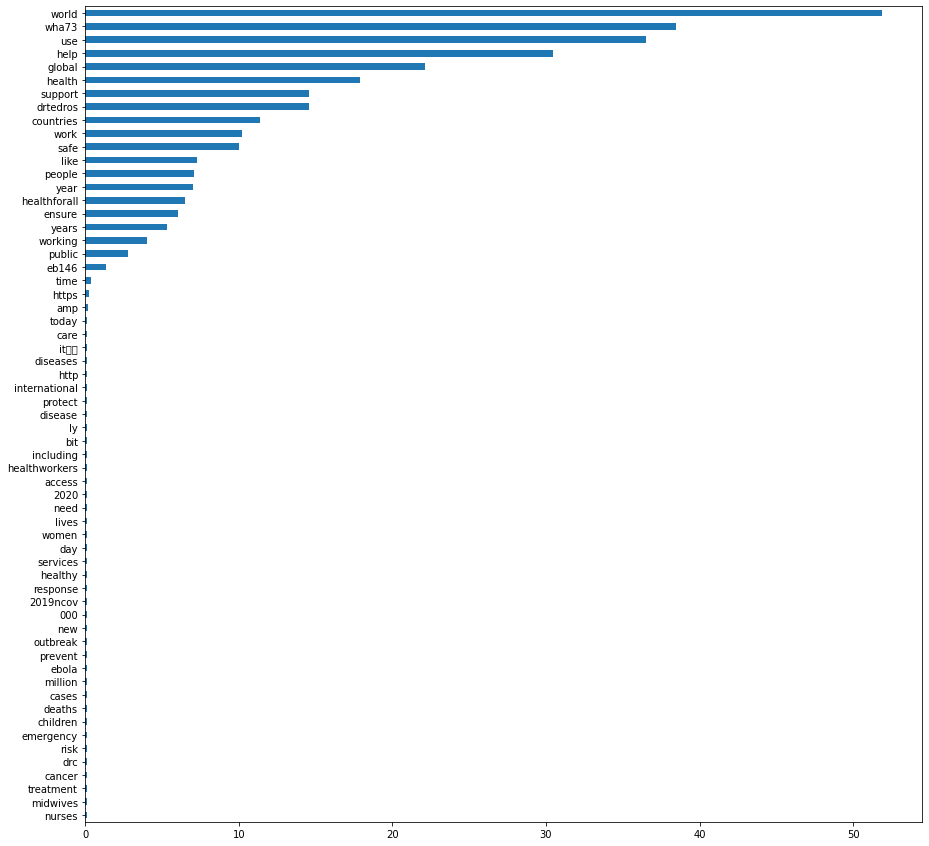

In [ ]:
for topic in range(components_df.shape[0]):
    print(f'For topic {topic+1}:')
    components_df.iloc[topic].sort_values().plot.barh(figsize=(15,15))
    plt.show()

In [ ]:
df_ = components_df
df_.index = ['topic'+str(i+1) for i in range(10)]

import plotly.express as px

plt.figure(figsize=(15,15))
# df = px.data.gapminder().query("continent == 'Europe' and year == 2007 and pop > 2.e6")
fig = px.bar(df_, x=df_.columns.tolist(),
            title="LDA Topic Modeling")
fig.show()

<Figure size 1080x1080 with 0 Axes>